In [1]:
import os

import pandas as pd

from SALib.sample import morris as ms
from SALib.analyze import morris as ma
from SALib.plotting import morris as mp
from SALib.util import read_param_file
from SALib.plotting.morris import horizontal_bar_plot, covariance_plot, sample_histograms

from pybps import BPSProject

import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
projdir_path = '../examples/trnsys_sunspace'
param_file = 'Parameter_Ranges.csv'
model_output = 'QCOOL'

In [3]:
factors = pd.read_csv(os.path.join(projdir_path, param_file), header=None)
factors

,0,1,2
0,OVERHANG_PROJ,0.60,1.40
1,INF_RATE,0.60,1.40
2,T_HEAT,19.00,21.00
3,T_COOL,24.00,26.00
4,LIG_SCALE,0.70,1.00
5,INS_RES,5.50,8.50
6,INS_THICK,0.05,0.08
7,CONC_DENS,1400.00,2000.00


In [4]:
problem = read_param_file(os.path.join(projdir_path, param_file))
problem

{'bounds': [[0.6, 1.4],
  [0.6, 1.4],
  [19.0, 21.0],
  [24.0, 26.0],
  [0.7, 1.0],
  [5.5, 8.5],
  [0.05, 0.08],
  [1400.0, 2000.0]],
 'dists': None,
 'groups': None,
 'names': ['OVERHANG_PROJ',
  'INF_RATE',
  'T_HEAT',
  'T_COOL',
  'LIG_SCALE',
  'INS_RES',
  'INS_THICK',
  'CONC_DENS'],
 'num_vars': 8}

In [5]:
# Morris OAT sampling
r = 5 # Number of elementary effects or number of trajectories; Typical values: between 5 and 10
p = 6 # Number of levels in the OAT sampling; Typical value: 4 or 6
delta = 2 # "grid jump" (minimum jump from one level to the other); Typical value: 1 or 2
param_values = ms.sample(problem, N=r, num_levels=p, grid_jump=delta, optimal_trajectories=None)

In [6]:
samples = pd.DataFrame(param_values, columns=problem['names'])
samples.to_csv(os.path.join(projdir_path, "Parameter_Samples.csv"), index=False)
samples

,OVERHANG_PROJ,INF_RATE,T_HEAT,T_COOL,LIG_SCALE,INS_RES,INS_THICK,CONC_DENS
0,1.08,1.24,20.6,24.8,0.94,7.9,0.074,1760.0
1,1.08,1.24,20.6,24.8,0.94,7.9,0.062,1760.0
2,1.08,1.24,20.6,25.6,0.94,7.9,0.062,1760.0
3,1.08,1.24,20.6,25.6,0.94,7.9,0.062,1520.0
4,1.08,1.24,19.8,25.6,0.94,7.9,0.062,1520.0
5,1.08,0.92,19.8,25.6,0.94,7.9,0.062,1520.0
6,1.08,0.92,19.8,25.6,0.82,7.9,0.062,1520.0
7,1.40,0.92,19.8,25.6,0.82,7.9,0.062,1520.0
8,1.40,0.92,19.8,25.6,0.82,6.7,0.062,1520.0
9,1.08,0.92,20.2,24.4,0.82,6.1,0.062,1520.0


## Evaluate

In [8]:
batch = BPSProject(projdir_path)


Batch Series ID: 25WHSAAS

BPS project directory: C:\Users\dtavan\Documents\etamine-sa\examples\trnsys_sunspace
Custom pybps_config.ini config file will be used instead of default config.ini
TRNSYS simulation project found in directory


In [9]:
batch.add_jobs()


45 jobs added to BPSProject instance


In [12]:
batch.jobs2df()
batch.jobs_df

,CONC_DENS,INF_RATE,INS_RES,INS_THICK,LIG_SCALE,ModelFile,OVERHANG_PROJ,SampleFile,T_COOL,T_HEAT
25WHSAAS_00001,1760.0,1.24,7.9,0.074,0.94,SunSpace-Shading.dck,1.08,Parameter_Samples.csv,24.8,20.6
25WHSAAS_00002,1760.0,1.24,7.9,0.062,0.94,SunSpace-Shading.dck,1.08,Parameter_Samples.csv,24.8,20.6
25WHSAAS_00003,1760.0,1.24,7.9,0.062,0.94,SunSpace-Shading.dck,1.08,Parameter_Samples.csv,25.6,20.6
25WHSAAS_00004,1520.0,1.24,7.9,0.062,0.94,SunSpace-Shading.dck,1.08,Parameter_Samples.csv,25.6,20.6
25WHSAAS_00005,1520.0,1.24,7.9,0.062,0.94,SunSpace-Shading.dck,1.08,Parameter_Samples.csv,25.6,19.8
25WHSAAS_00006,1520.0,0.92,7.9,0.062,0.94,SunSpace-Shading.dck,1.08,Parameter_Samples.csv,25.6,19.8
25WHSAAS_00007,1520.0,0.92,7.9,0.062,0.82,SunSpace-Shading.dck,1.08,Parameter_Samples.csv,25.6,19.8
25WHSAAS_00008,1520.0,0.92,7.9,0.062,0.82,SunSpace-Shading.dck,1.40,Parameter_Samples.csv,25.6,19.8
25WHSAAS_00009,1520.0,0.92,6.7,0.062,0.82,SunSpace-Shading.dck,1.40,Parameter_Samples.csv,25.6,19.8
25WHSAAS_00010,1520.0,0.92,6.1,0.062,0.82,SunSpace-Shading.dck,1.08,Parameter_Samples.csv,24.4,20.2


In [11]:
batch.run()


Starting batch run ...
4 core(s) used in current run (max local cores)



In [13]:
batch.runsum2df()
batch.runsum_df

,JobID,Message,Warnings,Errors,SimulTime(sec)
0,25WHSAAS_00001,Simulation ended successfully,0,0,7.781
1,25WHSAAS_00002,Simulation ended successfully,0,0,7.690
2,25WHSAAS_00003,Simulation ended successfully,0,0,7.683
3,25WHSAAS_00004,Simulation ended successfully,0,0,7.743
4,25WHSAAS_00005,Simulation ended successfully,0,0,7.837
5,25WHSAAS_00006,Simulation ended successfully,0,0,7.829
6,25WHSAAS_00007,Simulation ended successfully,0,0,7.958
7,25WHSAAS_00008,Simulation ended successfully,0,0,7.895
8,25WHSAAS_00009,Simulation ended successfully,0,0,7.895
9,25WHSAAS_00010,Simulation ended successfully,0,0,7.985


In [14]:
batch.results2df()
batch.results_df

,Month,QHEAT,QCOOL,JobID
0,January,672.724,0.000,25WHSAAS_00001
1,February,531.776,0.000,25WHSAAS_00001
2,March,384.050,0.000,25WHSAAS_00001
3,April,269.934,0.431,25WHSAAS_00001
4,May,108.163,36.915,25WHSAAS_00001
5,June,11.403,177.503,25WHSAAS_00001
6,July,0.000,421.757,25WHSAAS_00001
7,August,0.000,377.012,25WHSAAS_00001
8,September,3.810,160.631,25WHSAAS_00001
9,October,95.618,11.965,25WHSAAS_00001


In [15]:
results = batch.results_df
results_tot = results[results.Month == 'Total'].drop('Month', axis=1).set_index('JobID')
results_tot

,QHEAT,QCOOL
JobID,,
25WHSAAS_00001,3214.132,1186.214
25WHSAAS_00002,3231.700,1181.897
25WHSAAS_00003,3229.572,983.684
25WHSAAS_00004,3236.661,988.474
25WHSAAS_00005,2841.392,987.341
25WHSAAS_00006,2173.889,1032.245
25WHSAAS_00007,2404.215,907.400
25WHSAAS_00008,2485.115,871.414
25WHSAAS_00009,2497.226,860.970


In [16]:
results_max = results[results.Month == 'Maximum Value'].drop('Month', axis=1).set_index('JobID')
results_max

,QHEAT,QCOOL
JobID,,
25WHSAAS_00001,2.043,1.662
25WHSAAS_00002,2.047,1.660
25WHSAAS_00003,2.047,1.573
25WHSAAS_00004,2.064,1.585
25WHSAAS_00005,1.978,1.585
25WHSAAS_00006,1.682,1.465
25WHSAAS_00007,1.735,1.411
25WHSAAS_00008,1.742,1.404
25WHSAAS_00009,1.744,1.399


## Perform Sensitivity Analysis

### Total of Output Variables

In [17]:
Y = results_tot[model_output]
Y

JobID
25WHSAAS_00001    1186.214
25WHSAAS_00002    1181.897
25WHSAAS_00003     983.684
25WHSAAS_00004     988.474
25WHSAAS_00005     987.341
25WHSAAS_00006    1032.245
25WHSAAS_00007     907.400
25WHSAAS_00008     871.414
25WHSAAS_00009     860.970
25WHSAAS_00010    1166.262
25WHSAAS_00011    1032.810
25WHSAAS_00012    1028.025
25WHSAAS_00013    1022.283
25WHSAAS_00014    1020.753
25WHSAAS_00015    1033.562
25WHSAAS_00016     857.801
25WHSAAS_00017     909.949
25WHSAAS_00018     885.586
25WHSAAS_00019    1214.443
25WHSAAS_00020    1216.934
25WHSAAS_00021    1275.398
25WHSAAS_00022    1270.006
25WHSAAS_00023    1274.437
25WHSAAS_00024    1312.789
25WHSAAS_00025    1169.378
25WHSAAS_00026    1181.310
25WHSAAS_00027     991.197
25WHSAAS_00028     892.374
25WHSAAS_00029     887.603
25WHSAAS_00030     898.486
25WHSAAS_00031     899.231
25WHSAAS_00032     904.650
25WHSAAS_00033     971.719
25WHSAAS_00034    1014.956
25WHSAAS_00035     880.413
25WHSAAS_00036    1049.115
25WHSAAS_00037     960

In [21]:
# Perform the sensitivity analysis using the model output 
# Specify which column of the output file to analyze (zero-indexed) 
Si = ma.analyze(problem, param_values, Y, conf_level=0.95,  
                    print_to_console=True, 
                    num_levels=p, grid_jump=delta, num_resamples=1000) 
# Returns a dictionary with keys 'mu', 'mu_star', 'sigma', and 'mu_star_conf' 
# e.g. Si['mu_star'] contains the mu* value for each parameter, in the
# same order as the parameter file 

Parameter                         Mu_Star         Mu    Mu_Star_Conf      Sigma
OVERHANG_PROJ                     117.696   -117.696          17.392     21.486
INF_RATE                          115.853   -115.853          32.701     41.318
T_HEAT                              3.159      3.159           1.507      2.007
T_COOL                            450.976   -450.976          25.777     32.983
LIG_SCALE                         329.966    329.966          15.554     20.123
INS_RES                            32.110     32.110           5.934      7.769
INS_THICK                          13.838     13.838           2.765      3.479
CONC_DENS                          11.803    -11.803           1.117      1.363


c:\program files\python36\lib\site-packages\SALib\analyze\morris.py:227: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  op_vec = model_outputs.reshape(num_trajectories, trajectory_size)


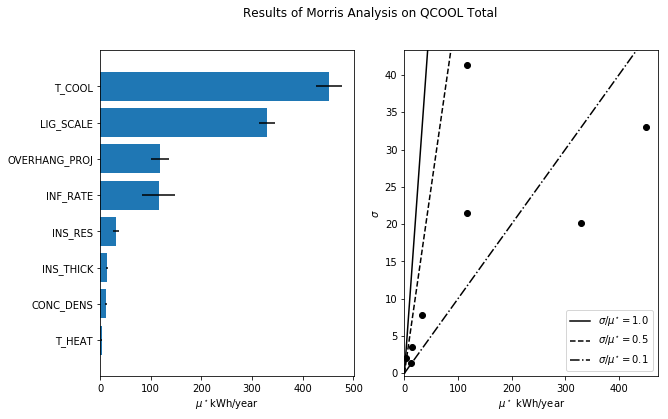

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
horizontal_bar_plot(ax1, Si,{}, sortby='mu_star', unit=r"kWh/year") 
covariance_plot(ax2, Si, {}, unit=r"kWh/year")
plt.suptitle('Results of Morris Analysis on {} {}'.format(model_output, 'Total'))
plt.show()

### Max of Output Variables

In [23]:
Y = results_max[model_output]
Y

JobID
25WHSAAS_00001    1.662
25WHSAAS_00002    1.660
25WHSAAS_00003    1.573
25WHSAAS_00004    1.585
25WHSAAS_00005    1.585
25WHSAAS_00006    1.465
25WHSAAS_00007    1.411
25WHSAAS_00008    1.404
25WHSAAS_00009    1.399
25WHSAAS_00010    1.519
25WHSAAS_00011    1.465
25WHSAAS_00012    1.453
25WHSAAS_00013    1.451
25WHSAAS_00014    1.451
25WHSAAS_00015    1.458
25WHSAAS_00016    1.380
25WHSAAS_00017    1.402
25WHSAAS_00018    1.524
25WHSAAS_00019    1.684
25WHSAAS_00020    1.684
25WHSAAS_00021    1.702
25WHSAAS_00022    1.692
25WHSAAS_00023    1.694
25WHSAAS_00024    1.562
25WHSAAS_00025    1.508
25WHSAAS_00026    1.513
25WHSAAS_00027    1.436
25WHSAAS_00028    1.420
25WHSAAS_00029    1.406
25WHSAAS_00030    1.412
25WHSAAS_00031    1.412
25WHSAAS_00032    1.414
25WHSAAS_00033    1.298
25WHSAAS_00034    1.305
25WHSAAS_00035    1.251
25WHSAAS_00036    1.319
25WHSAAS_00037    1.429
25WHSAAS_00038    1.442
25WHSAAS_00039    1.320
25WHSAAS_00040    1.312
25WHSAAS_00041    1.309
25WHSAAS_0

In [24]:
# Perform the sensitivity analysis using the model output 
# Specify which column of the output file to analyze (zero-indexed) 
Si = ma.analyze(problem, param_values, Y, conf_level=0.95,  
                    print_to_console=True, 
                    num_levels=p, grid_jump=delta, num_resamples=1000) 
# Returns a dictionary with keys 'mu', 'mu_star', 'sigma', and 'mu_star_conf' 
# e.g. Si['mu_star'] contains the mu* value for each parameter, in the
# same order as the parameter file 

Parameter                         Mu_Star         Mu    Mu_Star_Conf      Sigma
OVERHANG_PROJ                       0.033     -0.033           0.013      0.017
INF_RATE                            0.306      0.306           0.011      0.015
T_HEAT                              0.000      0.000           0.000      0.000
T_COOL                              0.190     -0.190           0.015      0.019
LIG_SCALE                           0.135      0.135           0.000      0.000
INS_RES                             0.015      0.015           0.003      0.003
INS_THICK                           0.005      0.005           0.000      0.000
CONC_DENS                           0.026     -0.026           0.008      0.011


c:\program files\python36\lib\site-packages\SALib\analyze\morris.py:227: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  op_vec = model_outputs.reshape(num_trajectories, trajectory_size)


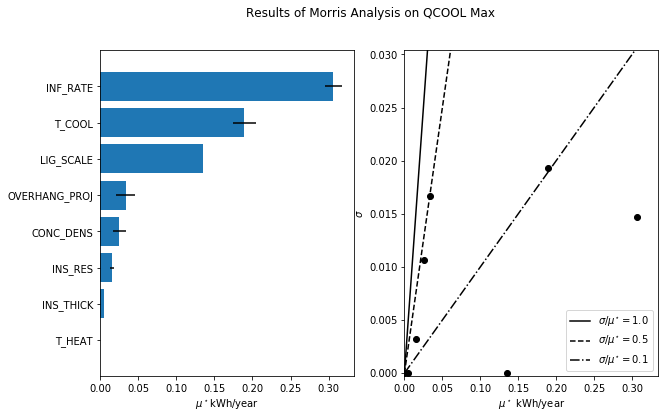

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
horizontal_bar_plot(ax1, Si,{}, sortby='mu_star', unit=r"kWh/year") 
covariance_plot(ax2, Si, {}, unit=r"kWh/year")
plt.suptitle('Results of Morris Analysis on {} {}'.format(model_output, 'Max'))
plt.show()